# Recomendações e contexto

Contexto geral:
- Empresa principal: Olist, plataforma de gestão para e-commerces
- E-commerces: vendedores que atuam dentro da plataforma
- Vendas em segmentação: Representativo de vendas dos e-commerces
- Marketing: Aquisição de novos e-commerces (clientes) para a plataforma


Recomendação segmentação geográfica: 
- Foco nas capitais de SP, RJ e MG 
- Mostraram bons números, os 3 estados juntos compõem 65% das vendas e 62% da receita.

Recomendação segmentação categoria de produto:
- Cama mesa banho -> maior número de vendas seguido por beleza_saude e esporte_lazer
- Apresentar os números dessa categoria para potenciais clientes que tenham produtos relacionados
- As 10 categorias mais vendidas representam 63% das vendas (tabela em Categoria produtos na análise)

Recomendação sazonalidade:
- Pico de vendas em novembro/2021 - mês em que costuma ter Black Friday, aumentar investimento de campanhas de marketing nesse mês
- Implementar estratégias de aumento do Ticket médio como descontos progressivos, programa de fidelidade e cross-selling.

Recomendações Customer Life time Value (CLV):
- Média de CLV de R$268,52 
- Mediana de R$112,14
- Enviar ofertas promocionais para os clientes que já efetuaram alguma compra
- Sugiro um estudo do custo de aquisição do cliente CAC, para avaliarmos o custo de cada cliente

Recomendações análise de sentimentos:
- Aparecem muitas palavras relacionadas ao produto e ao produto não ter sido entregue, avaliar o que pode estar acontecendo;


Leads Performance - captação de clientes para a plataforma Olist:
- Maior taxa de conversão foram de valores desconhecidos (o que ocorreu?)
- Efetuar uma análise de feedback para entender a baixa performance no fundo de funil
- Captação por meio de redes sociais teve uma conversão de lead para cliente de 5.55%, avaliar o custo benefício
- 75% dos clientes demoram até 54 dias para fechar com a empresa após o primeiro contato
- Captar e-mails e enviar ofertas e lembretes para potenciais clientes

Localização dos vendedores:
- Maioria dos vendedores da empresa estão situados no estado de SP, pode ser interessante investir em prospecção de possíveis clientes nessa área.

In [1]:
import pandas as pd
import numpy as np

# visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Lendo as bases

In [2]:
df_vendas = pd.read_csv('./bases-de-dados/olist_orders_dataset.csv')
df_clientes = pd.read_csv('./bases-de-dados/olist_customers_dataset.csv')
df_geolocation = pd.read_csv('./bases-de-dados/olist_geolocation_dataset.csv')
df_items =  pd.read_csv('./bases-de-dados/olist_order_items_dataset.csv')
df_pagamentos = pd.read_csv('./bases-de-dados/olist_order_payments_dataset.csv')
df_avaliacoes = pd.read_csv('./bases-de-dados/olist_order_reviews_dataset.csv')
df_produtos = pd.read_csv('./bases-de-dados/olist_products_dataset.csv')
df_vendedores = pd.read_csv('./bases-de-dados/olist_sellers_dataset.csv')

## Juntando as bases

In [3]:
df_clientes.info()

# df_pagamentos.to_excel('pagamentos-tratado.xlsx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
df_pagamentos['payment_value'].sum()

np.float64(16008872.12)

In [5]:
df = df_vendas.merge(df_clientes, how='inner')
df = df.merge(df_items, how='inner')
df = df.merge(df_avaliacoes, how='inner')
df = df.merge(df_pagamentos, how='inner')
df = df.merge(df_produtos, how='inner')
df = df.merge(df_vendedores, how='inner')

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP


# Limpeza de dados

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   customer_unique_id             117329 non-null  object 
 9   customer_zip_code_prefix       117329 non-null  int64  
 10  customer_city                  117329 non-null  object 
 11  customer_state                 117329 non-null  object 
 12  order_item_id                 

#### Dados nulos

In [7]:
# variáveis de texto
df['review_comment_title'] = df['review_comment_title'].fillna('sem titulo')
df['review_comment_message'] = df['review_comment_message'].fillna('sem avaliacao')
df['product_category_name'] = df['product_category_name'].fillna('categoria nao informada')

# variáveis numéricas
for column in df.columns:
    if df[column].isnull().sum() > 0 and (df[column].dtype == 'int64' or df[column].dtype == 'float64'):
        df[column] = df[column].fillna(df[column].median())

# datas
df.dropna(inplace=True)

In [8]:
df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_category_nam

In [9]:
df.shape

(114842, 39)

#### Tratando Datas

In [10]:
# configuração para ver todas colunas
pd.set_option("display.max_columns", 40)

In [11]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,sem titulo,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,sem titulo,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,sem titulo,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1,boleto,1,141.46,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,e73b67b67587f7644d5bd1a52deb1b01,5,sem titulo,sem avaliacao,2018-08-18 00:00:00,2018-08-22 19:07:58,1,credit_card,3,179.12,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP


In [12]:
colunas_de_data = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp']

df[colunas_de_data] = df[colunas_de_data].apply(pd.to_datetime)

df['mes_ano_compra'] = df['order_purchase_timestamp'].dt.strftime('%m/%Y')

df.dtypes


order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
review_id                                object
review_score                              int64
review_comment_title                    

In [13]:
df['mes_ano_compra'] = pd.to_datetime(df['mes_ano_compra'], format='%m/%Y')
df['mes_ano_compra']

0        2017-10-01
1        2017-10-01
2        2017-10-01
3        2018-07-01
4        2018-08-01
            ...    
117324   2018-02-01
117325   2017-08-01
117326   2018-01-01
117327   2018-01-01
117328   2018-03-01
Name: mes_ano_compra, Length: 114842, dtype: datetime64[ns]

#### Dados duplicados

In [14]:
df.duplicated().sum()

np.int64(0)

# Segmentação de cliente

## Região

### Estados

- São Paulo apresentou o maior número de compras, compondo 42% das vendas totais e 37,68% da receita total.
- Rio de Janeiro representa 12,87% das vendas e 13,54% da receita total.
- Minas Gerais representa 11,66% das vendas e 11,54% da receita total.

Os 3 primeiros estados representam 65% das vendas totais e 62% da receita.


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114842 entries, 0 to 117328
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114842 non-null  object        
 1   customer_id                    114842 non-null  object        
 2   order_status                   114842 non-null  object        
 3   order_purchase_timestamp       114842 non-null  datetime64[ns]
 4   order_approved_at              114842 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114842 non-null  datetime64[ns]
 6   order_delivered_customer_date  114842 non-null  datetime64[ns]
 7   order_estimated_delivery_date  114842 non-null  datetime64[ns]
 8   customer_unique_id             114842 non-null  object        
 9   customer_zip_code_prefix       114842 non-null  int64         
 10  customer_city                  114842 non-null  object        
 11  custo

In [16]:
clientes_por_estado = df['customer_state'].value_counts()

In [17]:
top_estados = clientes_por_estado.nlargest(10)
top_estados = top_estados.reset_index()
top_estados

,customer_state,count
0,SP,48506
1,RJ,14786
2,MG,13401
3,RS,6409
4,PR,5868
5,SC,4205
6,BA,3915
7,DF,2429
8,GO,2360
9,ES,2287


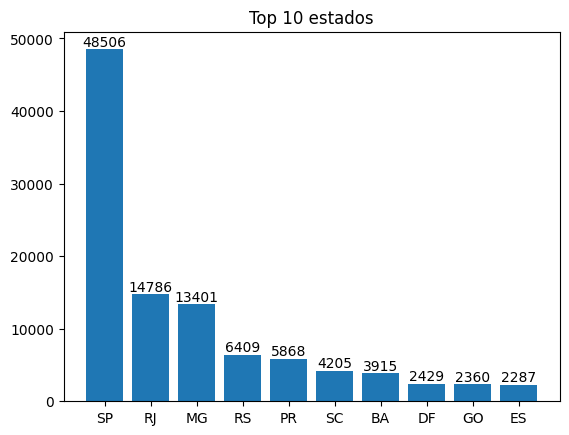

In [18]:
fig, axes = plt.subplots()
bars = axes.bar(top_estados['customer_state'], top_estados['count'])
axes.bar_label(bars)

plt.title('Top 10 estados')
plt.show()

##### Receita por estado

In [19]:
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
for estado in top_estados['customer_state']:
    print(f'{estado}________{locale.currency(df[df['customer_state'] == estado]['payment_value'].sum(), grouping=True)}')

SP________R$ 7.410.531,31
RJ________R$ 2.663.520,56
MG________R$ 2.269.697,10
RS________R$ 1.114.548,83
PR________R$ 1.033.468,80
SC________R$ 759.613,19
BA________R$ 770.292,03
DF________R$ 422.265,79
GO________R$ 449.441,92
ES________R$ 385.475,76


Representação percentual de receita em relação ao total - Estados top 3

In [20]:
lista_top_3 = ['SP', 'MG', 'RJ']

for estado in lista_top_3:
    receita = (df[df['customer_state'] == estado]['payment_value'].sum())  / df['payment_value'].sum() * 100

    print(f'Receita {estado}: {receita}')


Receita SP: 37.67905064638307
Receita MG: 11.540337447524905
Receita RJ: 13.542743681886233


### Cidades

Nota-se um padrão de consumo, onde as CAPITAIS de cada um dos top3 estados representam a maior concentração de vendas.

- No Estado de São Paulo tem uma grande concentração de vendas na cidade de São Paulo - 37% das vendas do estado na cidade
- No Estado do Rio de Janeiro tem uma grande concentração de vendas na cidade do Rio de Janeiro - 53% das vendas do estado na cidade
- Em Minas Gerais tem uma concentração de vendas maior na cidade de Belo Horizonte - 23% das vendas do estado na cidade


MG possui uma maior distribuição de vendas entre as cidades
RJ tem a menor distribuição de vendas, com mais da metade concentradas na capital


In [21]:
top_cidades =  df['customer_city'].value_counts().nlargest(10).reset_index()
top_cidades


,customer_city,count
0,sao paulo,18168
1,rio de janeiro,7915
2,belo horizonte,3195
3,brasilia,2413
4,curitiba,1784
5,campinas,1699
6,porto alegre,1619
7,salvador,1464
8,guarulhos,1351
9,sao bernardo do campo,1100


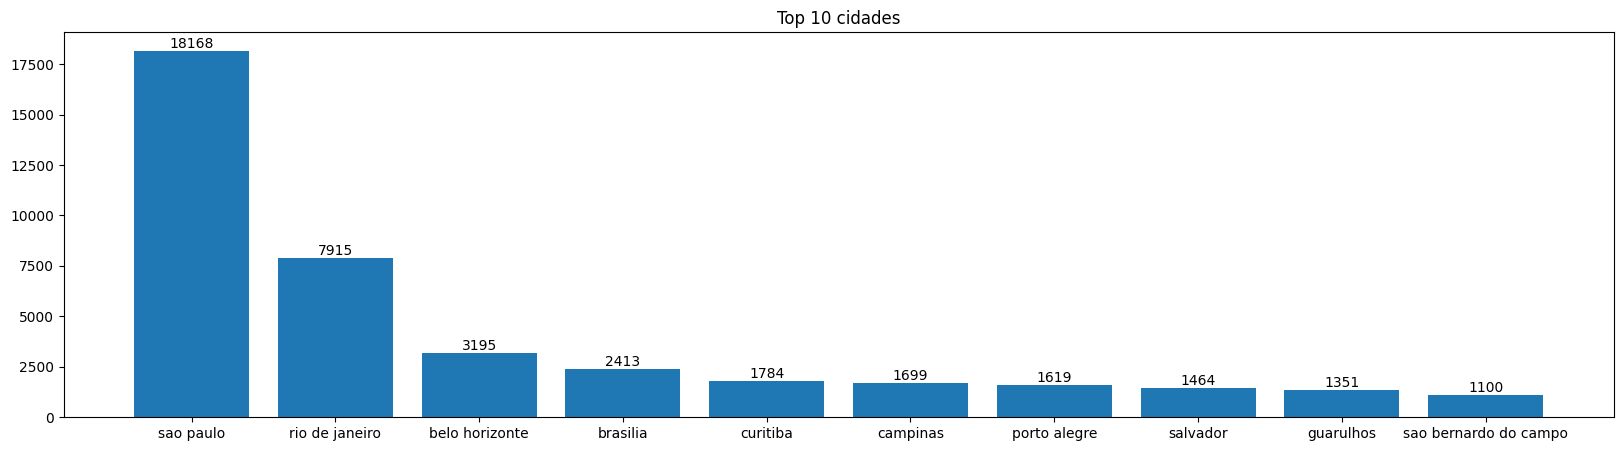

In [22]:
fig, axes = plt.subplots(figsize=(20, 5))
bars = axes.bar(top_cidades['customer_city'], top_cidades['count'])
axes.bar_label(bars)

plt.title('Top 10 cidades')
plt.show()

#### Avaliando cidades do top3 estados

In [23]:
clientes_sp = df[df['customer_state'] == 'SP']
melhores_cidades_sp = clientes_sp['customer_city'].value_counts().nlargest(10)
melhores_cidades_sp

customer_city
sao paulo                18168
campinas                  1699
guarulhos                 1351
sao bernardo do campo     1100
santo andre                894
osasco                     866
santos                     827
sao jose dos campos        797
sorocaba                   711
jundiai                    668
Name: count, dtype: int64

In [24]:
clientes_rj = df[df['customer_state'] == 'RJ']
melhores_cidades_rj = clientes_rj['customer_city'].value_counts().nlargest(10)
melhores_cidades_rj

customer_city
rio de janeiro           7915
niteroi                  1035
nova iguacu               499
sao goncalo               444
duque de caxias           308
petropolis                291
campos dos goytacazes     273
macae                     265
volta redonda             259
sao joao de meriti        167
Name: count, dtype: int64

In [25]:
clientes_mg = df[df['customer_state'] == 'MG']
melhores_cidades_mg = clientes_mg['customer_city'].value_counts().nlargest(10)
melhores_cidades_mg

customer_city
belo horizonte     3195
contagem            507
juiz de fora        486
uberlandia          429
montes claros       243
betim               216
ipatinga            216
uberaba             211
divinopolis         165
pocos de caldas     153
Name: count, dtype: int64

## Categoria produtos

- Cama_mesa_banho é a categoria com maior número de vendas seguido por beleza_saúde e esporte_lazer

- cama_mesa_banho tem um total de R$1.706.872,26 e representa cerca de 8% da receita

- As categorias com maior receita são cama_mesa_banho, beleza_saude e informática_acessorios e representam cerca de 24% da receita total

- As 5 categorias com maior número de vendas representam 40.6% das vendas

- As 10 categorias mais vendidas representam 63.6% das vendas

In [26]:
top_produtos = df['product_category_name'].value_counts().nlargest(10).reset_index()
top_produtos

,product_category_name,count
0,cama_mesa_banho,11684
1,beleza_saude,9749
2,esporte_lazer,8734
3,moveis_decoracao,8554
4,informatica_acessorios,7926
5,utilidades_domesticas,7154
6,relogios_presentes,6030
7,telefonia,4578
8,ferramentas_jardim,4451
9,automotivo,4259


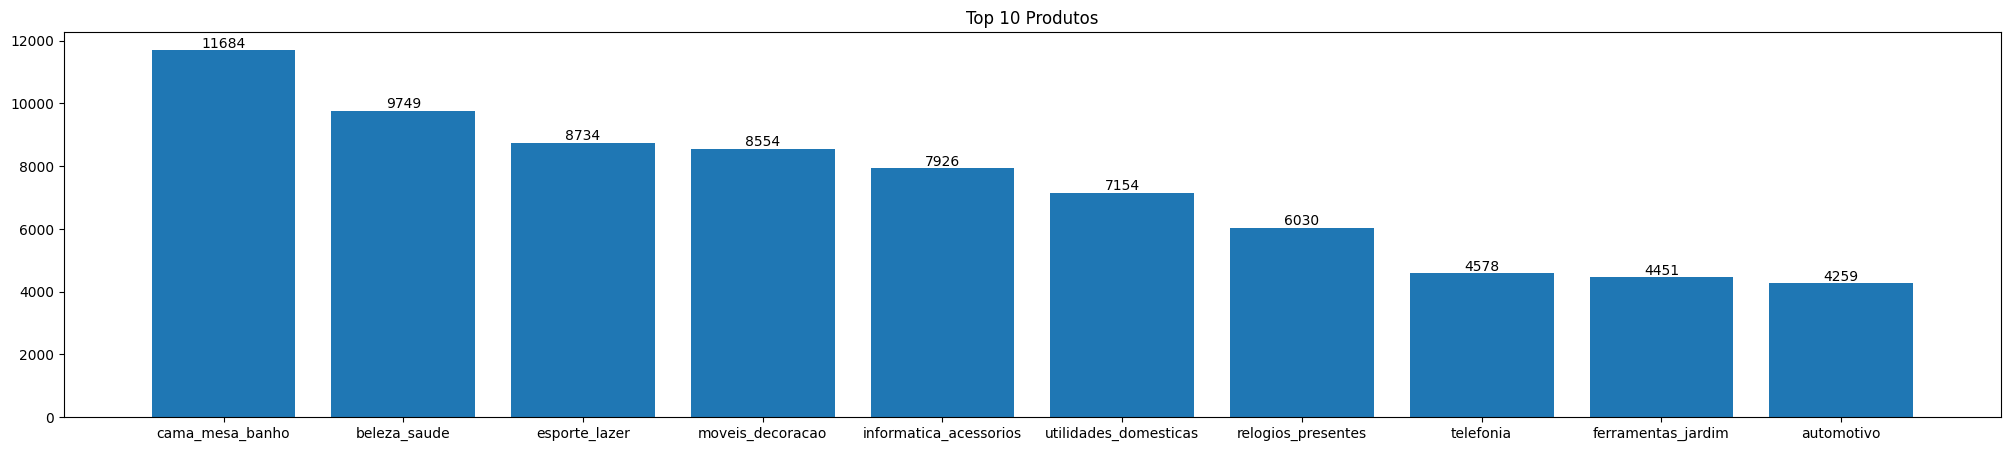

In [27]:
fig, axes = plt.subplots(figsize=(25, 5))

bars = axes.bar(top_produtos['product_category_name'], top_produtos['count'])
axes.bar_label(bars)


plt.title('Top 10 Produtos')
plt.show()

In [28]:
todos_produtos = df['product_category_name'].value_counts().reset_index()
todos_produtos['count'].sum()

np.int64(114842)

In [29]:
top_produtos['count'].sum() / 114842 * 100

np.float64(63.669215095522546)

In [30]:
# receita por categoria - top 10
receita_por_categoria = df.groupby(['product_category_name'])['payment_value'].sum().nlargest(10).reset_index()
receita_por_categoria

,product_category_name,payment_value
0,cama_mesa_banho,1706872.26
1,beleza_saude,1612019.96
2,informatica_acessorios,1557592.86
3,moveis_decoracao,1391435.19
4,relogios_presentes,1380171.71
5,esporte_lazer,1348405.70
6,utilidades_domesticas,1067227.12
7,ferramentas_jardim,807503.95
8,automotivo,783016.78
9,cool_stuff,737950.40


In [31]:
(1557592.86 / df['payment_value'].sum()) * 100

np.float64(7.919623816876453)

#### Produto

Top 10 produtos com maior número de vendas

In [32]:
df['product_id'].value_counts().nlargest(10).reset_index()

,product_id,count
0,aca2eb7d00ea1a7b8ebd4e68314663af,526
1,99a4788cb24856965c36a24e339b6058,507
2,422879e10f46682990de24d770e7f83d,507
3,389d119b48cf3043d311335e499d9c6b,402
4,368c6c730842d78016ad823897a372db,395
5,53759a2ecddad2bb87a079a1f1519f73,389
6,d1c427060a0f73f6b889a5c7c61f2ac4,344
7,53b36df67ebb7c41585e8d54d6772e08,323
8,154e7e31ebfa092203795c972e5804a6,286
9,3dd2a17168ec895c781a9191c1e95ad7,275


### Categoria por estado

#### TOP3 estados

In [33]:
vendas_sp = df[df['customer_state'] == 'SP'].copy()
vendas_rj = df[df['customer_state'] == 'RJ'].copy()
vendas_mg = df[df['customer_state'] == 'MG'].copy()

In [34]:
melhores_categorias_sp = vendas_sp['product_category_name'].value_counts().nlargest(10).reset_index()
melhores_categorias_rj = vendas_rj['product_category_name'].value_counts().nlargest(10).reset_index()
melhores_categorias_mg = vendas_mg['product_category_name'].value_counts().nlargest(10).reset_index()

In [35]:
melhores_categorias = pd.concat([melhores_categorias_sp, melhores_categorias_rj, melhores_categorias_mg], axis=1)

melhores_categorias.columns = [
    'Categoria SP', 'Contagem SP', 
    'Categoria RJ', 'Contagem RJ', 
    'Categoria MG', 'Contagem MG'
]

# Exibir o DataFrame combinado
print(melhores_categorias)

             Categoria SP  Contagem SP            Categoria RJ  Contagem RJ  \
0         cama_mesa_banho         5527         cama_mesa_banho         1720   
1            beleza_saude         4237        moveis_decoracao         1118   
2           esporte_lazer         3717            beleza_saude         1062   
3        moveis_decoracao         3668           esporte_lazer         1056   
4   utilidades_domesticas         3361  informatica_acessorios         1007   
5  informatica_acessorios         3186   utilidades_domesticas          897   
6      relogios_presentes         2291      relogios_presentes          850   
7              automotivo         1772      ferramentas_jardim          672   
8              brinquedos         1717              brinquedos          580   
9               telefonia         1674              cool_stuff          512   

             Categoria MG  Contagem MG  
0         cama_mesa_banho         1396  
1            beleza_saude         1080  
2  info

## Sazonalidade

Pico de vendas em nov/2017 com 8.821 vendas e uma receita acima de 1 milhão e 500 mil.

Número incomum em dez/2016 - somente 1 venda, partirei da premissa de que ocorreu algum erro ou problema nesse mês

Ticket médio bem equilibrado de acordo com a carta de controle, exceto pelo mês incomum de dez/2016, sem esse mês temos um ticket variando dentro do controle



In [36]:
variacao_vendas = df['mes_ano_compra'].value_counts().reset_index()
variacao_vendas['mes_ano_compra'] = pd.to_datetime(variacao_vendas['mes_ano_compra'], format='%m/%Y')
variacao_vendas = variacao_vendas.sort_values(by='mes_ano_compra')
variacao_vendas

,mes_ano_compra,count
20,2016-10-01,336
21,2016-12-01,1
19,2017-01-01,968
18,2017-02-01,1946
16,2017-03-01,3072
17,2017-04-01,2701
14,2017-05-01,4272
15,2017-06-01,3700
13,2017-07-01,4737
11,2017-08-01,5051


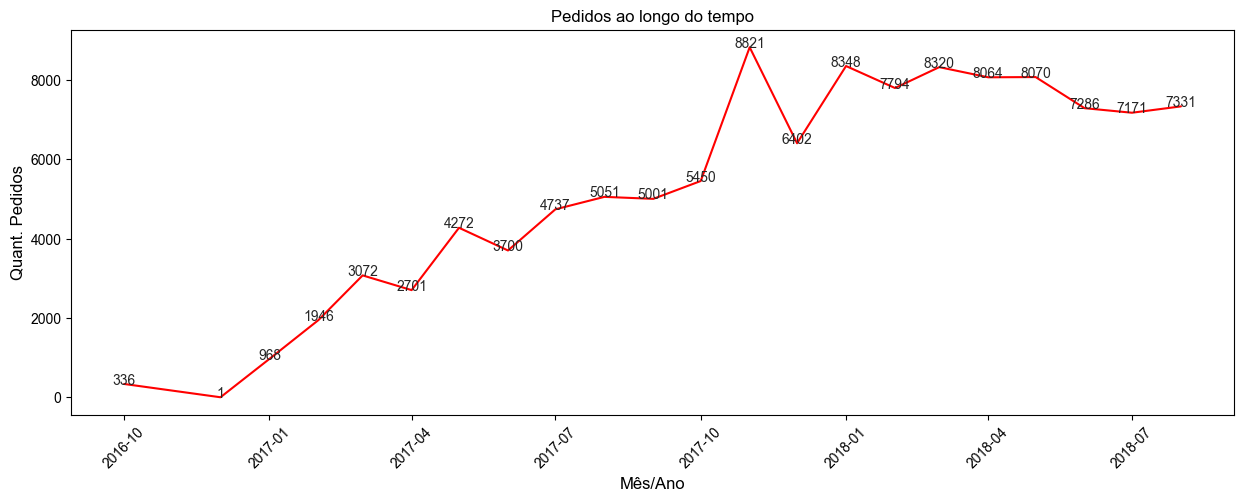

In [37]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
sns.set_theme(style="darkgrid")

sns.lineplot(variacao_vendas, x='mes_ano_compra', y='count', color='red')

[plt.text(x=row['mes_ano_compra'], y=row['count'] + 0.5, s=str(row['count']), ha='center', fontsize=10) for i, row in variacao_vendas.iterrows()]

plt.title('Pedidos ao longo do tempo')
plt.xlabel('Mês/Ano', fontsize=12)
plt.ylabel('Quant. Pedidos', fontsize=12)
plt.show()

In [38]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,mes_ano_compra
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,sem titulo,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1,credit_card,1,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,2017-10-01
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,sem titulo,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,3,voucher,1,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,2017-10-01
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,sem titulo,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,2,voucher,1,18.59,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,2017-10-01
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,1,boleto,1,141.46,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,2018-07-01
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,e73b67b67587f7644d5bd1a52deb1b01,5,sem titulo,sem avaliacao,2018-08-18,2018-08-22 19:07:58,1,credit_card,3,179.12,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP,2018-08-01


### Receita mensal

In [39]:
receitas = (df.groupby(df['mes_ano_compra'])['payment_value'].sum().sort_index())
receitas = receitas.reset_index()
receitas

,mes_ano_compra,payment_value
0,2016-10-01,61689.11
1,2016-12-01,19.62
2,2017-01-01,176772.25
3,2017-02-01,324545.97
4,2017-03-01,500109.46
5,2017-04-01,453172.78
6,2017-05-01,701196.69
7,2017-06-01,587107.80
8,2017-07-01,714455.57
9,2017-08-01,798796.98


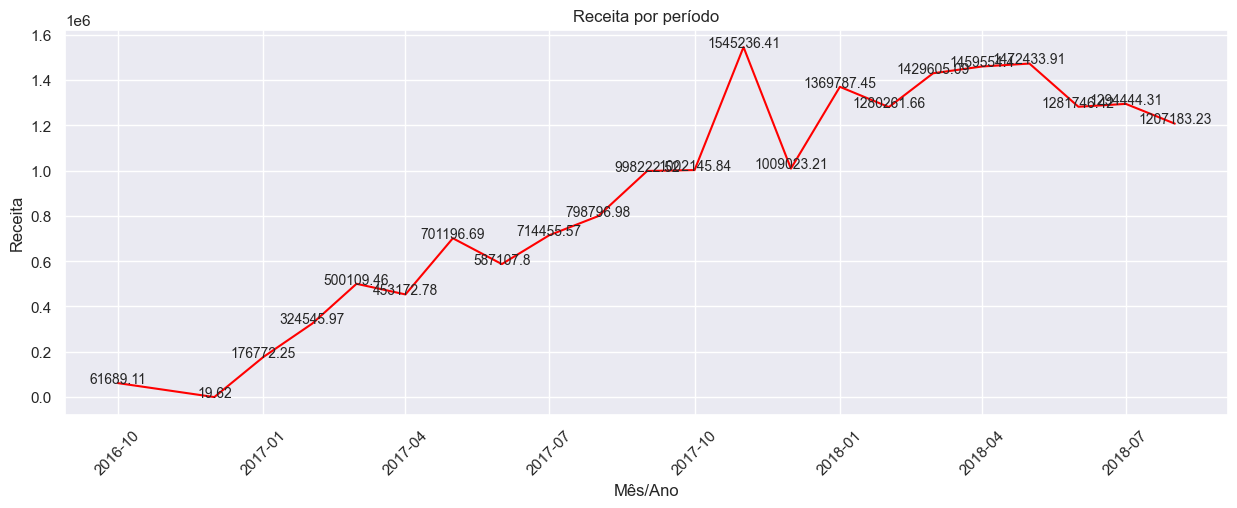

In [40]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
sns.set_theme(style="darkgrid")

sns.lineplot(receitas, x='mes_ano_compra', y='payment_value', color='red')

[plt.text(x=row['mes_ano_compra'], y=row['payment_value'] + 0.5, s=str(row['payment_value']), ha='center', fontsize=10) for i, row in receitas.iterrows()]

# for i, row in receitas.iterrows():
#     plt.text(x=row['mes_ano_compra'], y=row['payment_value'] + 0.5, s=str(row['payment_value']), ha='center', fontsize=10)


plt.title('Receita por período')
plt.xlabel('Mês/Ano', fontsize=12)
plt.ylabel('Receita', fontsize=12)
plt.show()

### Ticket médio

A empresa possui um ticket médio de R$164.00 e um desvio padrão de R$34.00

De acordo com a carta de controle o ticket médio se mostrou estável ao longo dos meses, com exceção do mês 12/2016 onde tivemos aquela questão relacionada a vendas, possivelmente algum problema técnico ou pausa nas operações.

Implementar estrategias de upselling e cross-selling visando o aumento do ticket médio

Implementar desconto de frete grátis para compras acima de X valor

In [41]:
periodo = list(df['mes_ano_compra'].unique())
print(periodo)

[Timestamp('2017-10-01 00:00:00'), Timestamp('2018-07-01 00:00:00'), Timestamp('2018-08-01 00:00:00'), Timestamp('2017-11-01 00:00:00'), Timestamp('2018-02-01 00:00:00'), Timestamp('2017-07-01 00:00:00'), Timestamp('2017-05-01 00:00:00'), Timestamp('2017-01-01 00:00:00'), Timestamp('2018-06-01 00:00:00'), Timestamp('2018-03-01 00:00:00'), Timestamp('2017-12-01 00:00:00'), Timestamp('2017-09-01 00:00:00'), Timestamp('2018-01-01 00:00:00'), Timestamp('2018-05-01 00:00:00'), Timestamp('2017-08-01 00:00:00'), Timestamp('2018-04-01 00:00:00'), Timestamp('2017-03-01 00:00:00'), Timestamp('2017-06-01 00:00:00'), Timestamp('2017-02-01 00:00:00'), Timestamp('2017-04-01 00:00:00'), Timestamp('2016-10-01 00:00:00'), Timestamp('2016-12-01 00:00:00')]


In [42]:
for mes_ano in periodo:    
    print(f'{mes_ano} : {locale.currency((df[df['mes_ano_compra'] == mes_ano]['payment_value'].sum()) / df[df['mes_ano_compra'] == mes_ano]['payment_value'].count(), grouping=True)}')

2017-10-01 00:00:00 : R$ 183,88
2018-07-01 00:00:00 : R$ 180,51
2018-08-01 00:00:00 : R$ 164,67
2017-11-01 00:00:00 : R$ 175,18
2018-02-01 00:00:00 : R$ 164,26
2017-07-01 00:00:00 : R$ 150,82
2017-05-01 00:00:00 : R$ 164,14
2017-01-01 00:00:00 : R$ 182,62
2018-06-01 00:00:00 : R$ 175,92
2018-03-01 00:00:00 : R$ 171,83
2017-12-01 00:00:00 : R$ 157,61
2017-09-01 00:00:00 : R$ 199,60
2018-01-01 00:00:00 : R$ 164,09
2018-05-01 00:00:00 : R$ 182,46
2017-08-01 00:00:00 : R$ 158,15
2018-04-01 00:00:00 : R$ 181,00
2017-03-01 00:00:00 : R$ 162,80
2017-06-01 00:00:00 : R$ 158,68
2017-02-01 00:00:00 : R$ 166,78
2017-04-01 00:00:00 : R$ 167,78
2016-10-01 00:00:00 : R$ 183,60
2016-12-01 00:00:00 : R$ 19,62


In [43]:
dados = {
    "Data": [
        "10/2017", "08/2017", "07/2017", "09/2017", "11/2017",
        "07/2018", "08/2018", "06/2018", "02/2018", "05/2018",
        "03/2018", "04/2018", "01/2018", "12/2017", "06/2017",
        "03/2017", "05/2017", "04/2017", "02/2017", "01/2017",
        "10/2016", "12/2016"
    ],
    "Valor": [
        183.88, 158.15, 150.82, 199.60, 175.18,
        180.51, 164.67, 175.92, 164.26, 182.46,
        171.83, 181.00, 164.09, 157.61, 158.68,
        162.80, 164.14, 167.78, 166.78, 182.62,
        183.60, 19.62
    ]
}

# Criando o DataFrame
df2 = pd.DataFrame(dados)

In [44]:
df2['Data'] = pd.to_datetime(df2['Data'], format=('%m/%Y'))
df2 = df2.sort_values(by='Data')
df2

,Data,Valor
20,2016-10-01,183.60
21,2016-12-01,19.62
19,2017-01-01,182.62
18,2017-02-01,166.78
15,2017-03-01,162.80
17,2017-04-01,167.78
16,2017-05-01,164.14
14,2017-06-01,158.68
2,2017-07-01,150.82
1,2017-08-01,158.15


In [45]:
df2['Valor'].describe()

count     22.000000
mean     164.363636
std       34.342757
min       19.620000
25%      163.122500
50%      167.280000
75%      180.877500
max      199.600000
Name: Valor, dtype: float64

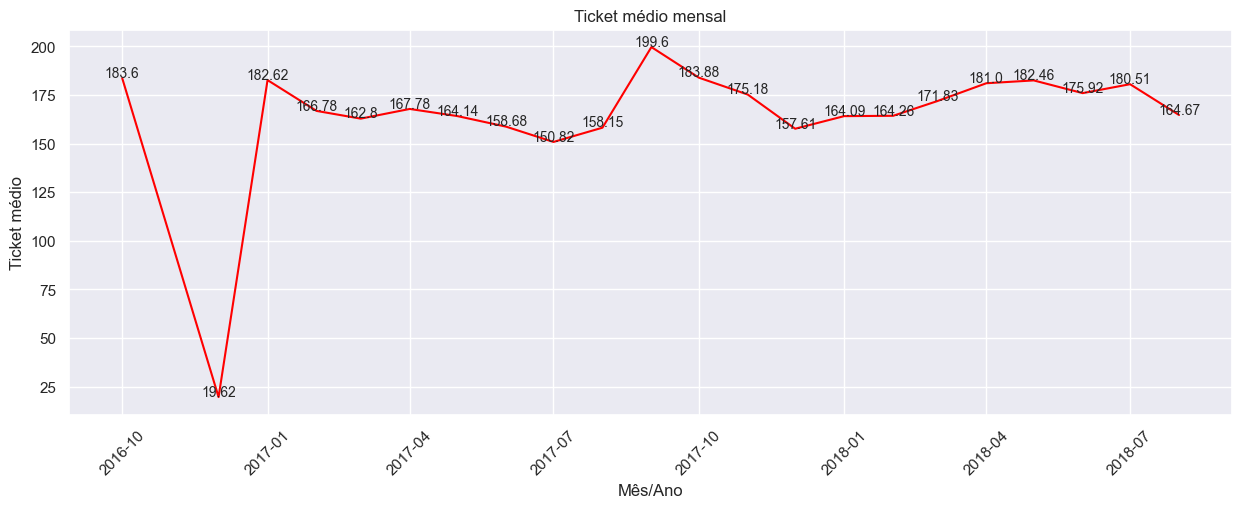

In [46]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
sns.set_theme(style="darkgrid")

sns.lineplot(data=df2, x='Data', y='Valor', color='red')


for i, row in df2.iterrows():
    plt.text(x=row['Data'], y=row['Valor'] + 0.5, s=str(row['Valor']), ha='center', fontsize=10)


plt.title('Ticket médio mensal')
plt.xlabel('Mês/Ano', fontsize=12)
plt.ylabel('Ticket médio', fontsize=12)
plt.show()

#### Comparativo sazonalidade

Text(0.5, 1.0, 'Vendas mensais')

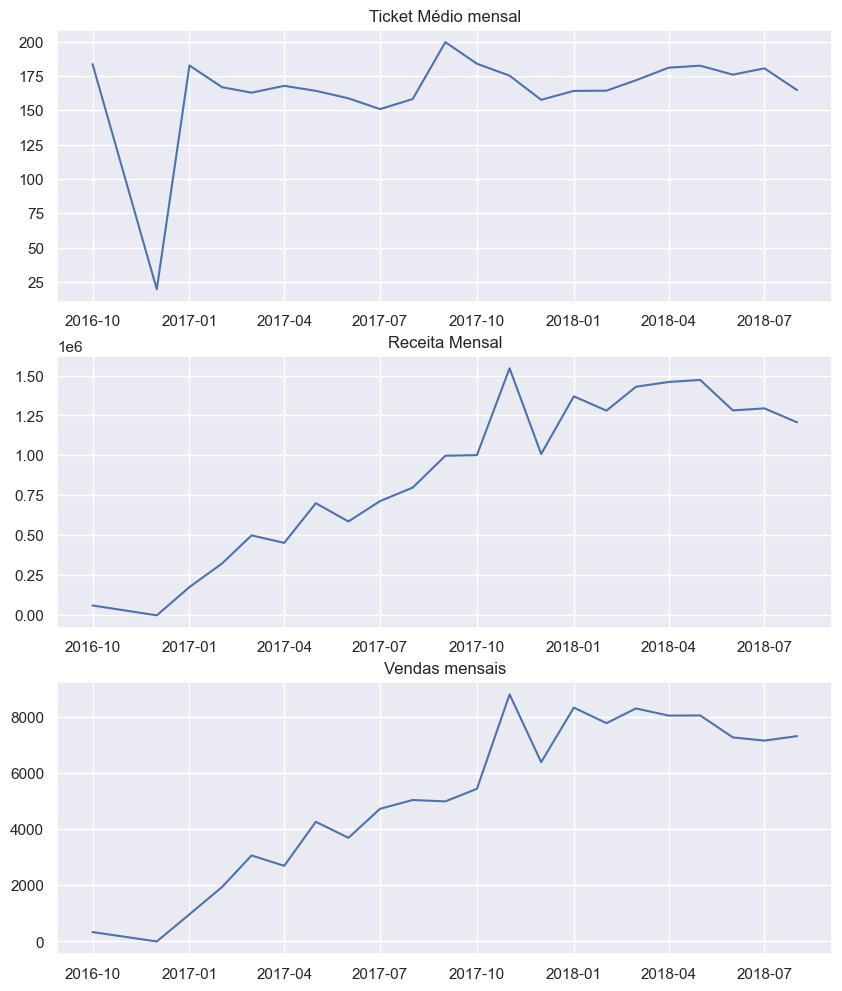

In [47]:
plt.figure(figsize=(10, 12))
plt.subplot(311)
plt.plot(df2['Data'], df2['Valor'])
plt.title('Ticket Médio mensal')

plt.subplot(312)
plt.plot(receitas['mes_ano_compra'], receitas['payment_value'])
plt.title('Receita Mensal')

plt.subplot(313)
plt.plot(variacao_vendas['mes_ano_compra'], variacao_vendas['count'])
plt.title('Vendas mensais')

#### Carta de controle ticket

##### Carta de controle sem o mês com 1 venda

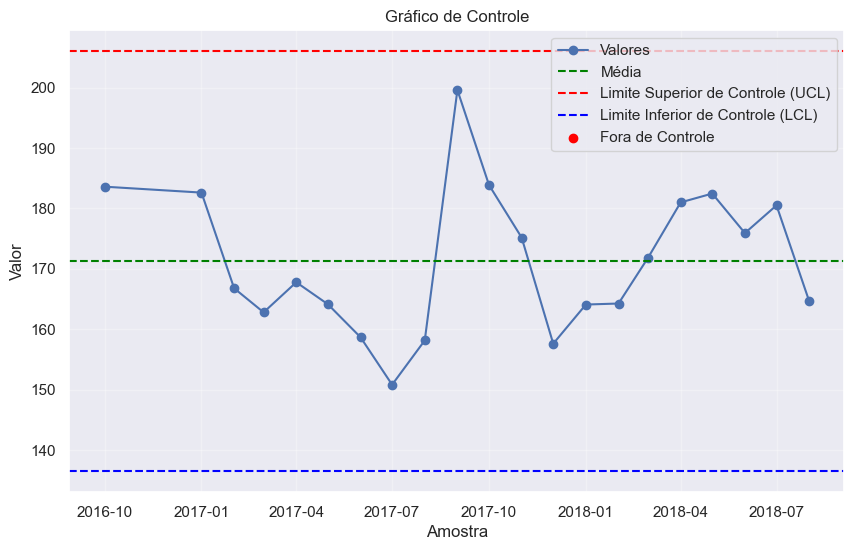

In [48]:
df3 = df2[df2['Valor'] > 50]
df3
# Calcular medidas do gráfico de controle
mean = np.mean(df3['Valor'])  # Média
std_dev = np.std(df3['Valor'])  # Desvio padrão
ucl = mean + 3 * std_dev  # Limite superior de controle (Upper Control Limit)
lcl = mean - 3 * std_dev  # Limite inferior de controle (Lower Control Limit)

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(df3['Data'], df3['Valor'], marker='o', label='Valores')
plt.axhline(mean, color='green', linestyle='--', label='Média')
plt.axhline(ucl, color='red', linestyle='--', label='Limite Superior de Controle (UCL)')
plt.axhline(lcl, color='blue', linestyle='--', label='Limite Inferior de Controle (LCL)')

# Destacar pontos fora dos limites
out_of_control = df3[(df3['Valor'] > ucl) | (df3['Valor'] < lcl)]
plt.scatter(out_of_control['Data'], out_of_control['Valor'], color='red', zorder=5, label='Fora de Controle')

# Personalizar o gráfico
plt.title('Gráfico de Controle')
plt.xlabel('Amostra')
plt.ylabel('Valor')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

##### Carta de controle com o mês que teve 1 venda

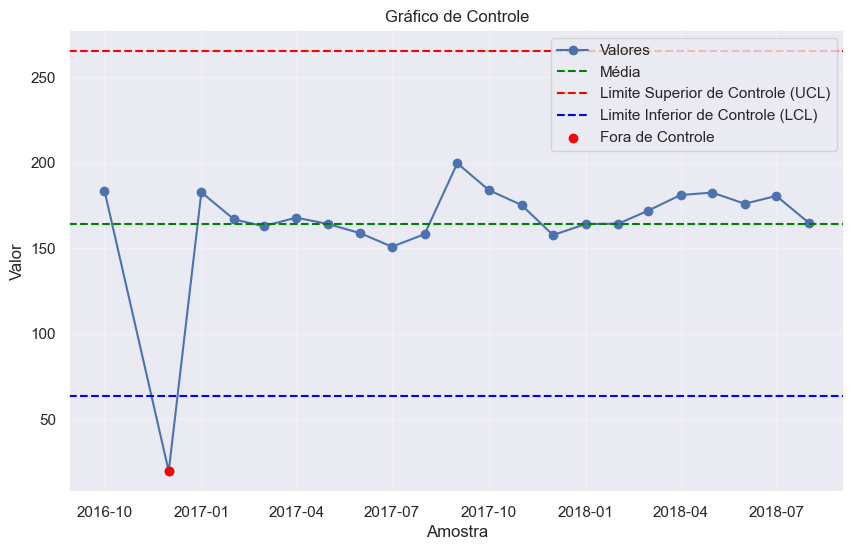

In [49]:
# Calcular medidas do gráfico de controle
mean = np.mean(df2['Valor'])  # Média
std_dev = np.std(df2['Valor'])  # Desvio padrão
ucl = mean + 3 * std_dev  # Limite superior de controle (Upper Control Limit)
lcl = mean - 3 * std_dev  # Limite inferior de controle (Lower Control Limit)

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(df2['Data'], df2['Valor'], marker='o', label='Valores')
plt.axhline(mean, color='green', linestyle='--', label='Média')
plt.axhline(ucl, color='red', linestyle='--', label='Limite Superior de Controle (UCL)')
plt.axhline(lcl, color='blue', linestyle='--', label='Limite Inferior de Controle (LCL)')

# Destacar pontos fora dos limites
out_of_control = df2[(df2['Valor'] > ucl) | (df2['Valor'] < lcl)]
plt.scatter(out_of_control['Data'], out_of_control['Valor'], color='red', zorder=5, label='Fora de Controle')

# Personalizar o gráfico
plt.title('Gráfico de Controle')
plt.xlabel('Amostra')
plt.ylabel('Valor')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Avaliando frete

Sem muitas diferenças de valor do frete por estado

In [50]:
for estado in top_estados['customer_state']:
    print(f'{estado}________{df[df['customer_state'] == estado]['freight_value'].describe()}')


SP________count    48506.000000
mean        15.163127
std         10.903236
min          0.000000
25%          9.340000
50%         12.970000
75%         16.290000
max        339.590000
Name: freight_value, dtype: float64
RJ________count    14786.000000
mean        21.038211
std         14.370681
min          0.000000
25%         15.190000
50%         17.600000
75%         21.190000
max        207.780000
Name: freight_value, dtype: float64
MG________count    13401.000000
mean        20.593485
std         13.844029
min          0.000000
25%         15.100000
50%         17.600000
75%         21.350000
max        322.100000
Name: freight_value, dtype: float64
RS________count    6409.000000
mean       21.670688
std        14.649001
min         0.000000
25%        15.440000
50%        17.880000
75%        21.650000
max       254.550000
Name: freight_value, dtype: float64
PR________count    5868.000000
mean       20.549724
std        14.628993
min         0.000000
25%        15.100000
50%  

# Top vendedores

In [51]:
top_vendedores = df['seller_id'].value_counts().nlargest(10).reset_index()
top_vendedores

,seller_id,count
0,4a3ca9315b744ce9f8e9374361493884,2093
1,6560211a19b47992c3666cc44a7e94c0,2076
2,1f50f920176fa81dab994f9023523100,2003
3,cc419e0650a3c5ba77189a1882b7556a,1828
4,da8622b14eb17ae2831f4ac5b9dab84a,1650
5,955fee9216a65b617aa5c0531780ce60,1492
6,1025f0e2d44d7041d6cf58b6550e0bfa,1456
7,7c67e1448b00f6e969d365cea6b010ab,1445
8,7a67c85e85bb2ce8582c35f2203ad736,1218
9,ea8482cd71df3c1969d7b9473ff13abc,1217


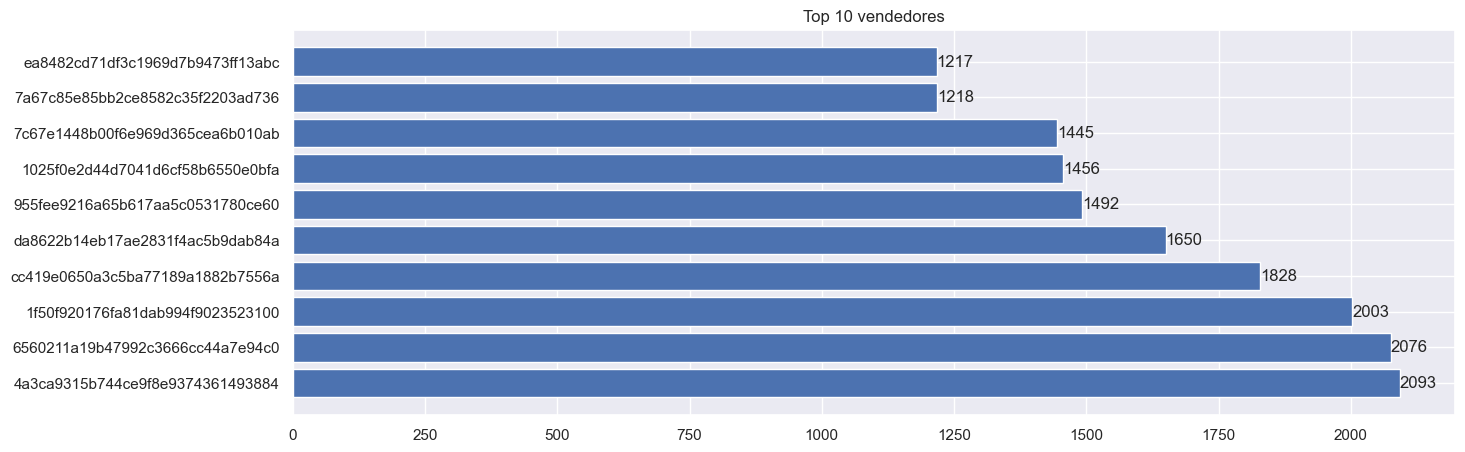

In [52]:
fig, axes = plt.subplots(figsize=(15, 5))

bar_value = axes.barh(top_vendedores['seller_id'], top_vendedores['count'])
axes.bar_label(bar_value)


plt.title('Top 10 vendedores')
plt.show()

### Localização dos e-commerces

A maioria dos vendedores estão situados no estado de SP

In [53]:
ecommerce_loc = df.groupby(['seller_id'])['seller_state'].value_counts().reset_index()
ecommerce_loc['review'] = df['review_score']
ecommerce_loc['seller_city'] = df['seller_city']
ecommerce_loc.head(3)

,seller_id,seller_state,count,review,seller_city
0,0015a82c2db000af6aaaf3ae2ecb0532,SP,3,4.0,maua
1,001cca7ae9ae17fb1caed9dfb1094831,ES,233,4.0,maua
2,002100f778ceb8431b7a1020ff7ab48f,SP,58,4.0,maua


In [54]:
ecommerce_loc['seller_state'].value_counts().nlargest(10).reset_index()

,seller_state,count
0,SP,1767
1,PR,333
2,MG,235
3,SC,184
4,RJ,163
5,RS,125
6,GO,39
7,DF,30
8,ES,22
9,BA,18


In [55]:
ecommerce_loc['seller_city'].value_counts().nlargest(10).reset_index()

,seller_city,count
0,sao paulo,764
1,ibitinga,200
2,santo andre,83
3,curitiba,77
4,belo horizonte,72
5,sao jose do rio preto,68
6,ribeirao preto,61
7,guarulhos,58
8,maringa,50
9,rio de janeiro,49


Nota de review

In [56]:
ecommerce_loc['review'].describe()

count    2906.000000
mean        4.082932
std         1.335986
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: review, dtype: float64

# Customer life value (CLV)

Temos uma média de CLV de R$268.52 e uma mediana de R$112.14

- Aparenta ser um CLV médio abaixo do esperado, porém temos a presença de muitos outliers

- Temos uma média muito superior a mediana, além de um alto desvio padrão e um valor máximo acima de 80 mil, o que sugere que possuímos alguns clientes muito valiosos

- Há muito potencial para retenção de clientes visto que 75% dos clientes possuem um CLV de até R$200,00

- Para uma interpretação mais completa, sugiro um estudo do custo de aquisição por cliente, onde poderemos analisar se o CLV supera ou não o valor do CAC.

In [57]:
# frequencia de compras
df_quanti_compras = df['customer_unique_id'].value_counts().reset_index()

#media por compra
df_compra_media = df.groupby(df['customer_unique_id'])['payment_value'].mean().reset_index()

# diferença entre primeira e ultima compra em semanas
df_ultima_compra = df.groupby(df['customer_unique_id'])['order_purchase_timestamp'].max().reset_index()
df_primeira_compra = df.groupby(df['customer_unique_id'])['order_purchase_timestamp'].min().reset_index()

# Renomeando as colunas 
df_ultima_compra.rename(columns={'order_purchase_timestamp': 'ultima_compra'}, inplace=True)
df_primeira_compra.rename(columns={'order_purchase_timestamp': 'primeira_compra'}, inplace=True)

# Mesclando os DataFrames com base no 'customer_unique_id'
df_diferencas = pd.merge(df_primeira_compra, df_ultima_compra, on='customer_unique_id')

# Calculando a diferença em semanas
df_diferencas['diferenca_semanas'] = ((df_diferencas['ultima_compra'] - df_diferencas['primeira_compra']).dt.days / 7)
df_diferencas['diferenca_semanas'] = df_diferencas['diferenca_semanas'].replace(0, 1)


#juntando todos em um único df
df_clv = pd.merge(df_diferencas, df_quanti_compras, on='customer_unique_id')
df_clv = pd.merge(df_clv, df_compra_media, on='customer_unique_id')
df_clv.rename(columns={'count': 'numero_de_compras'}, inplace=True)
df_clv.rename(columns={'payment_value': 'valor_medio_por_compra'}, inplace=True)

In [58]:
df_clv['vida_util_cliente'] = (df_clv['diferenca_semanas'] / (df_clv['numero_de_compras'] - 1)) 

# tratando valores infinitos
df_clv['vida_util_cliente'] = df_clv['vida_util_cliente'].apply(lambda x: 1 if np.isinf(x) else x)


In [59]:
df_clv['clv'] = (df_clv['vida_util_cliente'] * df_clv['numero_de_compras'] * df_clv['valor_medio_por_compra'])

In [60]:
df_clv['clv'].describe()

count    92738.000000
mean       268.523922
std       1125.961284
min          1.945238
25%         63.220000
50%        112.140000
75%        200.330000
max      81879.770000
Name: clv, dtype: float64

In [61]:
df_clv['categoria_produto'] = df['product_category_name']
df_clv.head()

,customer_unique_id,primeira_compra,ultima_compra,diferenca_semanas,numero_de_compras,valor_medio_por_compra,vida_util_cliente,clv,categoria_produto
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,1.0,1,141.90,1.0,141.90,utilidades_domesticas
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,1.0,1,27.19,1.0,27.19,utilidades_domesticas
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,1.0,1,86.22,1.0,86.22,utilidades_domesticas
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,1.0,1,43.62,1.0,43.62,perfumaria
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,1.0,1,196.89,1.0,196.89,automotivo


In [62]:
df['product_category_name'].value_counts().nlargest(10)

product_category_name
cama_mesa_banho           11684
beleza_saude               9749
esporte_lazer              8734
moveis_decoracao           8554
informatica_acessorios     7926
utilidades_domesticas      7154
relogios_presentes         6030
telefonia                  4578
ferramentas_jardim         4451
automotivo                 4259
Name: count, dtype: int64

## Analisando CLV por categoria

- a categoria ferramentas_jardim apresenta um máximo de CLV acima dos 80 mil, demonstrando um importante cliente nessa categoria

- beleza_saude tem uma grande quantidade de vendas, sendo um potencial bom para possíveis otimizações de retenção, visto que tem um alto desvio_padrao e valores baixos de CLV



In [63]:
top_categorias = df_clv.groupby(df_clv['categoria_produto'])['clv'].describe().reset_index()
top_categorias

,categoria_produto,count,mean,std,min,25%,50%,75%,max
0,agro_industria_e_comercio,201.0,431.547478,1886.856346,13.840000,57.600000,113.890,221.7600,18893.218571
1,alimentos,412.0,232.996978,664.651488,16.780000,58.310000,109.755,196.8925,10537.000000
2,alimentos_bebidas,225.0,227.121849,428.484479,17.780000,61.790000,106.900,191.4600,4046.125714
3,artes,164.0,356.741553,1401.623927,17.780000,63.030000,114.660,189.4675,15039.600000
4,artes_e_artesanato,20.0,123.131167,145.016859,31.380000,55.652500,71.920,97.7550,559.893333
...,...,...,...,...,...,...,...,...,...
69,sinalizacao_e_seguranca,159.0,162.021365,227.273635,17.770000,60.523333,93.190,174.8250,1944.960000
70,tablets_impressao_imagem,69.0,161.596473,263.543675,23.300000,57.120000,98.700,177.4400,2064.880000
71,telefonia,3633.0,257.151819,803.977756,5.666667,62.990000,112.420,197.5800,19943.491429
72,telefonia_fixa,199.0,267.254713,688.919045,20.290000,63.995000,112.810,207.2550,7524.380000


- As categorias abaixo são excelentes potenciais para buscar uma maior retenção de clientes, visto o alto número de compras com o baixo CLV, porém vale uma análise no que é ofertado nessas categorias e no comportamento do mercado

In [64]:
top_categorias[top_categorias['count']> 6000]

,categoria_produto,count,mean,std,min,25%,50%,75%,max
11,beleza_saude,7741.0,260.309247,861.734225,3.800000,62.920,113.15,201.940,18506.895238
13,cama_mesa_banho,9145.0,261.236748,1076.646796,3.976765,62.010,108.50,197.060,44196.964286
33,esporte_lazer,6917.0,276.680454,1159.359966,4.848571,64.000,112.46,200.550,35215.000000
45,informatica_acessorios,6239.0,245.295071,915.123902,11.630000,63.225,109.21,196.760,36604.260000
55,moveis_decoracao,6675.0,280.941649,1168.570848,4.596111,62.795,115.90,207.085,36497.871429


<Axes: xlabel='clv'>

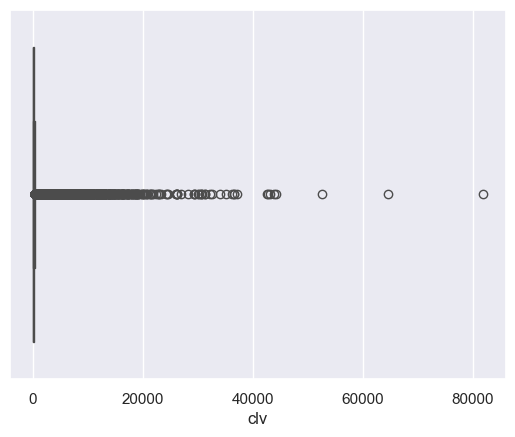

In [65]:
# gráfico de boxplot do CLV
import seaborn as sns

sns.boxplot(x=df_clv['clv'])

# Análise de sentimentos

In [66]:
df_avaliacoes = pd.read_csv('./bases-de-dados/olist_order_reviews_dataset.csv')
df_avaliacoes.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [67]:
df_avaliacoes.drop(columns=['review_id', 'order_id', 'review_creation_date', 'review_answer_timestamp'], inplace=True)
df_avaliacoes.dropna(inplace=True)
df_avaliacoes.head()

,review_score,review_comment_title,review_comment_message
9,4,recomendo,aparelho eficiente. no site a marca do aparelh...
15,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes..."
19,1,Não chegou meu produto,Péssimo
22,5,Ótimo,Loja nota 10
34,4,Muito bom.,Recebi exatamente o que esperava. As demais en...


In [68]:
import spacy


In [69]:
pln = spacy.load('pt_core_news_sm')

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('portuguese')

stop_words.remove('não')
stop_words.remove('nem')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aland\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
teste = 'a buli like FLOWER'

teste = str(teste).lower()
teste

'a buli like flower'

In [71]:
# função para pré-processamento dos textos

def preprocessamento(texto):

    documento = pln(str(texto).lower())
    lista = [token.lemma_ for token in documento]
    lista = [palavra for palavra in lista if palavra not in stop_words]
    lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
    return lista

In [72]:
df_avaliacoes['review_comment_message'] = df_avaliacoes['review_comment_message'].apply(preprocessamento)

In [73]:
df_avaliacoes['caracteres'] = df_avaliacoes['review_comment_message'].apply(len)
df_avaliacoes

,review_score,review_comment_title,review_comment_message,caracteres
9,4,recomendo,aparelho eficiente . em o site marca de o apar...,136
15,5,Super recomendo,"vendedor confiável , produto ok entregar antes...",59
19,1,Não chegou meu produto,péssimo,7
22,5,Ótimo,lojar nota,10
34,4,Muito bom.,recebi exatamente esperar . demais encomenda o...,89
...,...,...,...,...
99187,5,Nota máxima!,"obrigado , \r\n\r\n excelente atendimento , ba...",163
99192,4,👍,aprovar !,9
99196,5,muito bom produto,"ficar satisfeito produto , atender a o necessi...",75
99197,3,Não foi entregue o pedido,bom dia \r\n de o unidade comprado recebi unid...,65


In [74]:
#criando uma coluna de sentimentos
notas = [1 if score > 3 else -1 for score in df_avaliacoes['review_score']]
df_avaliacoes['sentimento'] = notas
df_avaliacoes

,review_score,review_comment_title,review_comment_message,caracteres,sentimento
9,4,recomendo,aparelho eficiente . em o site marca de o apar...,136,1
15,5,Super recomendo,"vendedor confiável , produto ok entregar antes...",59,1
19,1,Não chegou meu produto,péssimo,7,-1
22,5,Ótimo,lojar nota,10,1
34,4,Muito bom.,recebi exatamente esperar . demais encomenda o...,89,1
...,...,...,...,...,...
99187,5,Nota máxima!,"obrigado , \r\n\r\n excelente atendimento , ba...",163,1
99192,4,👍,aprovar !,9,1
99196,5,muito bom produto,"ficar satisfeito produto , atender a o necessi...",75,1
99197,3,Não foi entregue o pedido,bom dia \r\n de o unidade comprado recebi unid...,65,-1


In [75]:
df_avaliacoes[df_avaliacoes['sentimento'] == 1].describe()

,review_score,caracteres,sentimento
count,6855.000000,6855.000000,6855.0
mean,4.790956,48.392414,1.0
std,0.406656,37.846314,0.0
min,4.000000,0.000000,1.0
25%,5.000000,21.000000,1.0
50%,5.000000,40.000000,1.0
75%,5.000000,65.000000,1.0
max,5.000000,375.000000,1.0


In [76]:
df_avaliacoes[df_avaliacoes['sentimento'] == -1].describe()

,review_score,caracteres,sentimento
count,2984.000000,2984.000000,2984.0
mean,1.647453,82.499330,-1.0
std,0.849981,49.926476,0.0
min,1.000000,0.000000,-1.0
25%,1.000000,39.000000,-1.0
50%,1.000000,75.000000,-1.0
75%,2.000000,124.000000,-1.0
max,3.000000,205.000000,-1.0


<Axes: xlabel='sentimento', ylabel='count'>

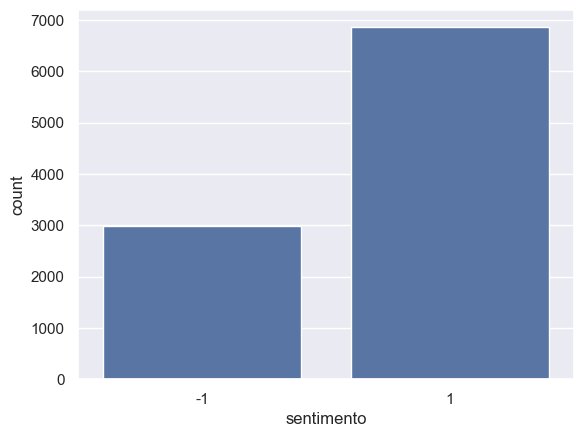

In [77]:
sns.countplot(x = df_avaliacoes['sentimento'])

## Nuvem de palavras

- Em relação aos textos positivos nota-se que as palavras mais usadas foram relacionadas a entrega, prazo e recomendação

- Em relação aos textos negativos nota-se grande uso de palavras relacionadas ao produto, entrega e não recebimento

In [78]:
textos_positivos = df_avaliacoes[df_avaliacoes['sentimento'] == 1]
textos_positivos = textos_positivos['review_comment_message']
textos_positivos.tolist()
textos_positivos_string = ' '.join(textos_positivos)

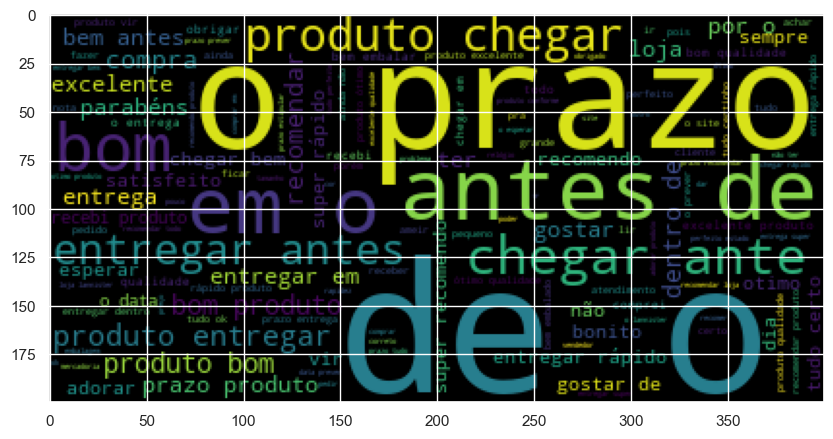

In [79]:
from wordcloud import WordCloud

plt.figure(figsize=(10, 10))
plt.imshow(WordCloud().generate(textos_positivos_string))

In [80]:
textos_negativos = df_avaliacoes[df_avaliacoes['sentimento'] == -1]
textos_negativos = textos_negativos['review_comment_message']
textos_negativos.tolist()
textos_negativos_string = ' '.join(textos_negativos)

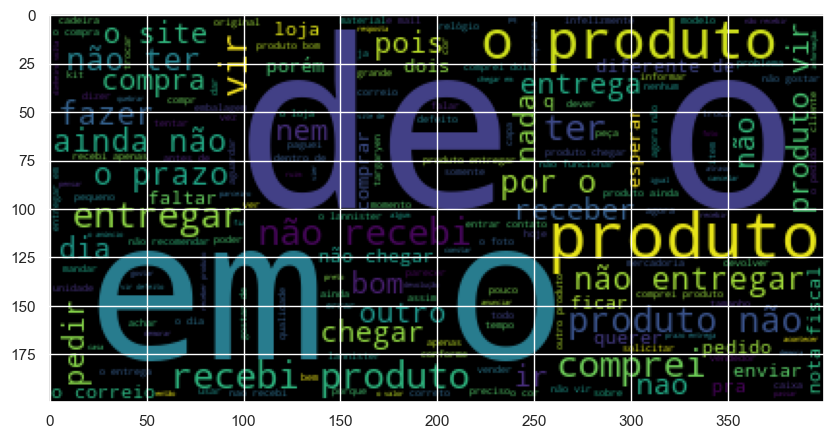

In [81]:
plt.figure(figsize=(10, 10))
plt.imshow(WordCloud().generate(textos_negativos_string))

# Leads Performance

Verificando a campanha de captação de leads para a empresa

In [82]:
df_qualificacao = pd.read_csv('bases-de-dados/olist_marketing_qualified_leads_dataset.csv')
df_qualificacao.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [83]:
df_qualificacao.isnull().sum()

mql_id                 0
first_contact_date     0
landing_page_id        0
origin                60
dtype: int64

In [84]:
df_qualificacao['origin'] = df_qualificacao['origin'].fillna('Não informado')

In [85]:
from modulos  import modulos_analise_dados as mad

In [86]:
df_leads = mad.tabela_freq_var_str(df_qualificacao, 'origin', 3)

In [87]:
df_contrato_fechado = pd.read_csv('bases-de-dados/olist_closed_deals_dataset.csv')
df_contrato_fechado.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


In [88]:
df_contrato_fechado.isnull().sum()

mql_id                             0
seller_id                          0
sdr_id                             0
sr_id                              0
won_date                           0
business_segment                   1
lead_type                          6
lead_behaviour_profile           177
has_company                      779
has_gtin                         778
average_stock                    776
business_type                     10
declared_product_catalog_size    773
declared_monthly_revenue           0
dtype: int64

In [89]:
for coluna in df_contrato_fechado.columns:
    df_contrato_fechado[coluna] = df_contrato_fechado[coluna].fillna('Desconhecido')

### Distribuição contrato fechado

In [90]:
mad.tabela_freq_var_str(df_contrato_fechado, 'business_segment', 3)

,Frequência absoluta,Frequência relativa,Frequência acumulada
business_segment,,,
home_decor,105,12.470309,12.470309
health_beauty,93,11.045131,23.515439
car_accessories,77,9.144893,32.660333
household_utilities,71,8.432304,41.092637
construction_tools_house_garden,69,8.194774,49.287411
audio_video_electronics,64,7.600950,56.888361
computers,34,4.038005,60.926366
pet,30,3.562945,64.489311
food_supplement,28,3.325416,67.814727


### Análise performance de conversão por origem

- Maior taxa de conversão foram e valores desconhecidos e/ou não informados

- Taxa geral de conversão SR dos leads foi de 10.5%
    - Parece haver leads desqualificados chegando ao fundo de funil
    - Fazer uma análise de feedback para verificar porque não está ocorrendo a conversão nessa etapa

- Captação por meio de 'social' teve uma conversão de lead para cliente de 5.55%, número bem abaixo

- O trafego pago teve uma margem de conversão levemente mais alta do que o tráfego orgânico, apesar de ter tido um número menor de leads captados

In [91]:
df_marketing = df_qualificacao.merge(df_contrato_fechado)

In [92]:
df_marketing.head()

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,Desconhecido,Desconhecido,Desconhecido,reseller,Desconhecido,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,2018-04-04,2f08471dfb83baef522f952438a36f6e,referral,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,Desconhecido,Desconhecido,Desconhecido,reseller,Desconhecido,0.0
2,327174d3648a2d047e8940d7d15204ca,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,Desconhecido,Desconhecido,Desconhecido,reseller,Desconhecido,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,2018-01-14,22c29808c4f815213303f8933030604c,paid_search,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,Desconhecido,Desconhecido,Desconhecido,Desconhecido,reseller,Desconhecido,0.0
4,ffe640179b554e295c167a2f6be528e0,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,Desconhecido,Desconhecido,Desconhecido,manufacturer,Desconhecido,0.0


In [93]:
df_conversao = mad.tabela_freq_var_str(df_marketing, 'origin', 3)

In [94]:
# conversão por origem
df_conversao['total_leads'] = df_leads['Frequência absoluta']
df_conversao['taxa_conversao'] = df_conversao['Frequência absoluta'] / df_conversao['total_leads'] * 100
df_conversao

,Frequência absoluta,Frequência relativa,Frequência acumulada,total_leads,taxa_conversao
origin,,,,,
organic_search,271,32.185273,32.185273,2296,11.803136
paid_search,195,23.159145,55.344418,1586,12.295082
unknown,179,21.258907,76.603325,1099,16.287534
social,75,8.907363,85.510689,1350,5.555556
direct_traffic,56,6.650831,92.161520,499,11.222445
referral,24,2.850356,95.011876,284,8.450704
email,15,1.781473,96.793349,493,3.042596
Não informado,14,1.662708,98.456057,60,23.333333
display,6,0.712589,99.168646,118,5.084746


In [95]:
sr_total = 842 / 8000 * 100
sr_total

10.525

## Trabalhando com datas

- a média para fechar contato desde a primeira comunicação é de 48 dias porém o desvio padrão é bem alto (75 dias)

- a mediana é de 14 dias 

- 75% dos clientes demoram até 54 dias para fechar com a empresa após o primeiro contato

In [96]:
df_marketing['first_contact_date'] = pd.to_datetime(df_marketing['first_contact_date'], format='%Y-%m-%d')
df_marketing['won_date'] = pd.to_datetime(df_marketing['won_date'])
df_marketing['tempo_primeiro_contato_fechar'] = (df_marketing['won_date'] - df_marketing['first_contact_date'])

In [97]:
df_marketing['tempo_primeiro_contato_fechar'] = pd.to_timedelta(df_marketing['tempo_primeiro_contato_fechar']).dt.days

df_marketing['tempo_primeiro_contato_fechar'].describe()

count    842.000000
mean      48.440618
std       75.328117
min       -2.000000
25%        5.000000
50%       14.000000
75%       54.750000
max      427.000000
Name: tempo_primeiro_contato_fechar, dtype: float64